+------+----------+
| H    |   phi(H) |
+======+==========+
| H(0) |   0.7953 |
+------+----------+
| H(1) |   0.2047 |
+------+----------+
+------+----------+
| E    |   phi(E) |
+======+==========+
| E(0) |   0.6772 |
+------+----------+
| E(1) |   0.3228 |
+------+----------+
+------+------+------------+
| H    | W    |   phi(H,W) |
+======+======+============+
| H(0) | W(0) |     0.4776 |
+------+------+------------+
| H(0) | W(1) |     0.3178 |
+------+------+------------+
| H(1) | W(0) |     0.1093 |
+------+------+------------+
| H(1) | W(1) |     0.0954 |
+------+------+------------+


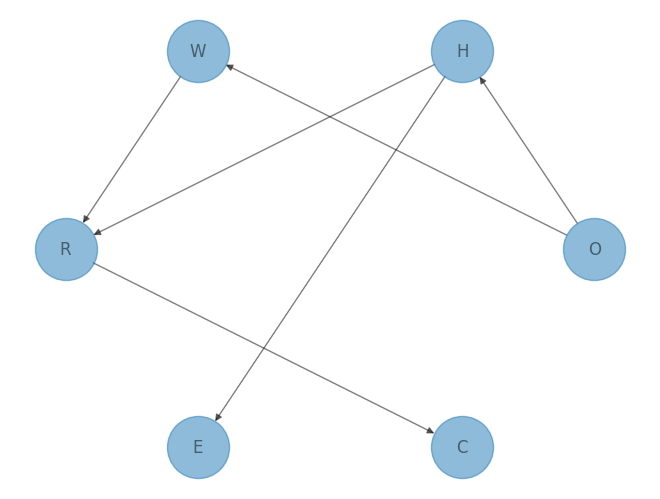

In [ ]:
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination
import networkx as nx
import numpy as np

# Punctul a
model = DiscreteBayesianNetwork([('O', 'H'), ('O', 'W'), ('H', 'R'), ('W', 'R'), ('H', 'E'), ('R', 'C')])
pos = nx.circular_layout(model)
nx.draw(model, with_labels=True, pos=pos, alpha=0.5, node_size=2000)

CPD_O = TabularCPD(variable='O', variable_card=2, values=[[0.3], [0.7]])
# cold = 0
# mild = 1

CPD_H = TabularCPD(variable='H', variable_card=2, 
                   values=[[0.9, 0.8],
                           [0.1, 0.2]],
                    evidence=['O'],
                    evidence_card=[2])
# no = 0
# yes = 1

CPD_W = TabularCPD(variable='W', variable_card=2,
                   values=[[0.9, 0.4],
                           [0.1, 0.6]],
                    evidence=['O'],
                    evidence_card=[2])
# no = 0
# yes = 1

CPD_R = TabularCPD(variable='R', variable_card=2,
                   values=[[0.5, 0.7, 0.1, 0.4],
                           [0.5, 0.3, 0.9, 0.6]],
                    evidence=['H', 'W'],
                    evidence_card=[2, 2])
# cool = 0
# warm = 1

CPD_E = TabularCPD(variable='E', variable_card=2,
                   values=[[0.8, 0.2],
                           [0.2, 0.8]],
                    evidence=['H'],
                    evidence_card=[2])
# low = 0
# high = 1

CPD_C = TabularCPD(variable='C', variable_card=2,
                   values=[[0.6, 0.15],
                           [0.4, 0.85]],
                    evidence=['R'],
                    evidence_card=[2])
# uncomf = 0
# comf = 1

model.add_cpds(CPD_O, CPD_H, CPD_W, CPD_R, CPD_E, CPD_C)
model.check_model()
model.local_independencies(['O', 'H', 'W', 'R', 'E', 'C'])


# Punctl b
infer = VariableElimination(model)
# P(H = yes | C = comf) = 0.2047
posterior_p1 = infer.query(['H'], evidence={'C': 1})
# P(E = high | C = comf) = 0.3228
posterior_p2 = infer.query(['E'], evidence={'C': 1})
# MAP (H, W) stiind C = comf = 0.4776 (luam valoarea maxima din tabel)
posterior_p3 = infer.query(['H', 'W'], evidence={'C': 1})

print(posterior_p1)
print(posterior_p2)
print(posterior_p3)


# Punctul c

